# Computation resource usage evaluation
This notebook was used to plot resource usage for different variants of the Random Forest classifier. The data required here comprise a single csv file with parameter values, CPU counts, required RAM as well as total wall time.

In [129]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [130]:
def time_to_seconds(time_str):
    # check it's not a nan
    if time_str == time_str:
        time_split = time_str.split(":")
        time_sec = int(time_split[0])*3600 + int(time_split[1])*60 + int(time_split[2])
    else:
        time_sec = None
    return time_sec

def generate_model_label(row):
    a = str(int(row['max_depth'])) if not row['max_depth'] == 'none' else 'none'
    b = str(int(row['n_estimators'])) if not row['n_estimators'] == 'none' else 'none'
    c = str(row['max_features']) if not row['max_features'] == 'none' else 'none'
    label = '-'.join([a, b, c])
    return label

In [162]:
# import data
data = pd.read_csv("/Users/mziemski/data/eval_rf/resource_usage.csv")
data

,max_depth,n_estimators,max_features,confidence,CPUs,Memory (GB),Walltime,Success
0,16,100,sqrt,0.6,28.0,44.99,19:47:07,Complete
1,16,100,sqrt,0.7,28.0,44.99,19:47:07,Complete
2,16,100,sqrt,0.8,28.0,44.99,19:47:07,Complete
3,16,100,none,0.6,28.0,44.99,19:47:07,Complete
4,16,100,none,0.7,28.0,44.99,19:47:07,Complete
5,16,100,none,0.8,28.0,44.99,19:47:07,Complete
6,16,1000,sqrt,0.6,14.0,429.93,14:11:15,Complete
7,16,1000,sqrt,0.7,14.0,440.49,14:32:31,Complete
8,16,1000,sqrt,0.8,14.0,439.49,14:04:15,Complete
9,16,1000,none,0.6,14.0,234.88,41:34:36,Complete


In [132]:
data["model label"] = data.apply(generate_model_label, axis=1)

In [133]:
data["Walltime [s]"] = data["Walltime"].apply(time_to_seconds)
data["Walltime [h]"] = data["Walltime [s]"] / 3600
data["CPU-hours"] = data["Walltime [h]"] * data["CPUs"]
data.head()

,max_depth,n_estimators,max_features,confidence,CPUs,Memory (GB),Walltime,Success,model label,Walltime [s],Walltime [h],CPU-hours
0,16,100,sqrt,0.6,28.0,44.99,19:47:07,Complete,16-100-sqrt,71227.0,19.785278,553.987778
1,16,100,sqrt,0.7,28.0,44.99,19:47:07,Complete,16-100-sqrt,71227.0,19.785278,553.987778
2,16,100,sqrt,0.8,28.0,44.99,19:47:07,Complete,16-100-sqrt,71227.0,19.785278,553.987778
3,16,100,none,0.6,28.0,44.99,19:47:07,Complete,16-100-none,71227.0,19.785278,553.987778
4,16,100,none,0.7,28.0,44.99,19:47:07,Complete,16-100-none,71227.0,19.785278,553.987778


In [158]:
data_grouped = data[["model label", "Memory (GB)", "Walltime [h]", "CPU-hours", "confidence", "CPUs"]].groupby(["model label"])

In [159]:
data_grouped_mean = data_grouped.mean().reset_index()
data_grouped_sem = data_grouped.sem().reset_index()

In [160]:
data_grouped_mean

,model label,Memory (GB),Walltime [h],CPU-hours,confidence,CPUs
0,16-100-none,44.990000,19.785278,553.987778,0.7,28.0
1,16-100-sqrt,44.990000,19.785278,553.987778,0.7,28.0
2,16-1000-none,244.420000,41.653333,583.146667,0.7,14.0
3,16-1000-sqrt,436.636667,14.266759,199.734630,0.7,14.0
4,64-100-none,252.530000,28.760278,402.643889,0.7,14.0
5,64-100-sqrt,536.213333,15.445648,216.239074,0.7,14.0
6,64-1000-none,1341.440000,24.010370,768.331852,0.7,32.0
7,64-1000-sqrt,2771.626667,5.378611,172.115556,0.7,32.0
8,none-100-none,393.110000,42.527778,595.388889,0.7,14.0
9,none-1000-none,1280.000000,24.012870,768.411852,0.7,32.0


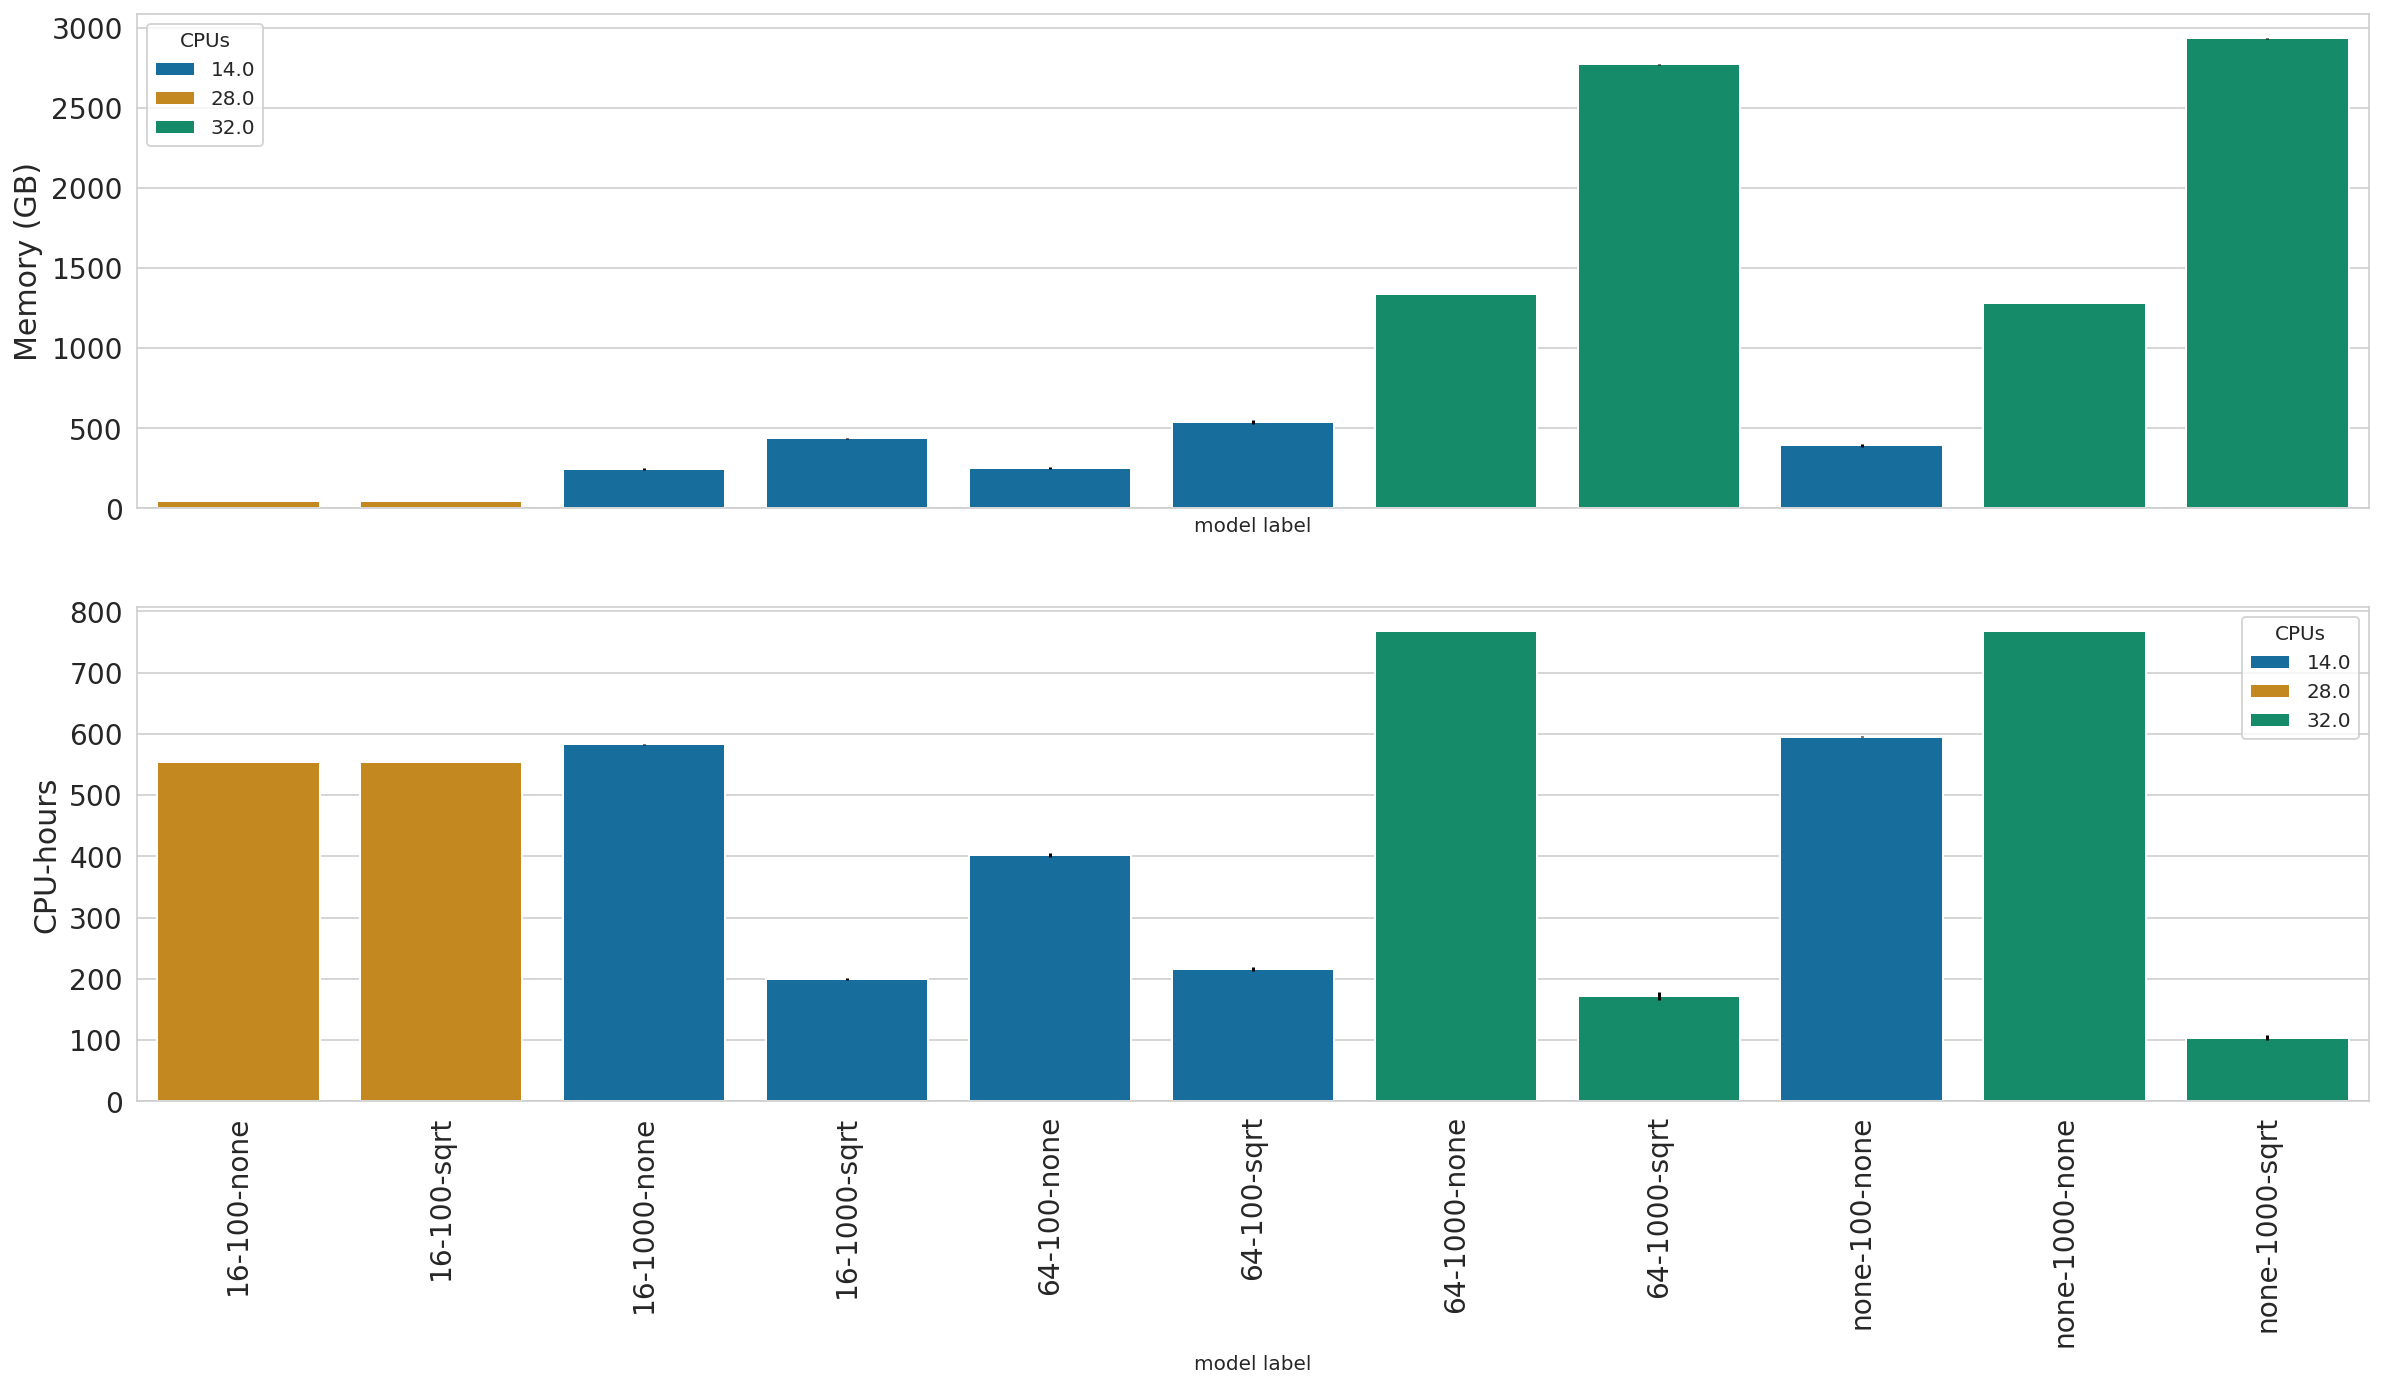

In [163]:
from matplotlib.ticker import LogLocator
with sns.axes_style("whitegrid"):
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    
#     ax1.set_yscale('log', basey=10)
#     minor_locator = LogLocator(base=10.0,subs=tuple(range(0.0,1.0,0.1)))
#     ax1.yaxis.set_minor_locator(minor_locator)
#     ax1.tick_params(which='minor', length=4)
#     ax1.grid(True, which='minor', axis='y')

    sns.barplot(
        x=data_grouped_mean["model label"], y=data_grouped_mean["Memory (GB)"], palette="colorblind",
        ax=ax1, hue=data_grouped_mean["CPUs"], yerr=data_grouped_sem["Memory (GB)"], dodge=False)
    sns.barplot(
        x=data_grouped_mean["model label"], y=data_grouped_mean["CPU-hours"], palette="colorblind", 
        ax=ax2, hue=data_grouped_mean["CPUs"], yerr=data_grouped_sem["CPU-hours"], dodge=False)
    
    for ax in (ax1, ax2):
        ax.yaxis.label.set_size(15)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14)
            tick.label.set_rotation(90)
            
f.savefig("/Users/mziemski/data/eval_rf/resource_usage.svg", dpi=300)